### Load python modules ###

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas
import pycountry
import seaborn as sns
import collections

import alluvial
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load datasets ###

In [2]:
cctdl_data_path = "../datasets/afri_cctld_ns.csv"

In [3]:
zonemaster_path = "../datasets/afri_cctld_zonemaster_result.csv"

In [4]:
zonemaster_data_path = "../datasets/afri_cctld_zonemaster_data.csv"

In [5]:
top_cctld_data_path = "../datasets/top_cctld_cctld_ns.csv"

In [6]:
df = pd.read_csv(cctdl_data_path, index_col=0, keep_default_na=False)

In [7]:
zdf = pd.read_csv(zonemaster_path, index_col=0, keep_default_na=False)

In [8]:
zdataf = pd.read_csv(zonemaster_data_path, index_col=0, keep_default_na=False)

#### Collect top 10 ccTLDs from [VERISIGN Domain Name Industry Brief of May 2020](https://www.verisign.com/assets/domain-name-report-Q12020.pdf) ####

In [9]:
top_df = pd.read_csv(top_cctld_data_path, index_col=0, keep_default_na=False)

In [10]:
df.head()

,cc,dnssec,dnssec_algo,deploy360,ns,authoritative,ip,af,asn4,asn6,region,anycast_provider,anycast_provider_ratio,out_region,out_region_4,out_region_6,anycast,anycast_4,anycast_6
0,AO,False,,False,AO01.DNS.PT,True,185.39.208.17,4,199993,,ripencc,,,100.0,100.0,100.0,66.666667,66.666667,66.666667
1,AO,False,,False,AO01.DNS.PT,True,2a04:6d80:0:0:0:0:0:17,6,199993,199993,ripencc,,,100.0,100.0,100.0,66.666667,66.666667,66.666667
2,AO,False,,False,AO03.DNS.PT,True,2001:500:14:6113:ad:0:0:1,6,199993,42,arin,pch,pch,100.0,100.0,100.0,66.666667,66.666667,66.666667
3,AO,False,,False,AO03.DNS.PT,True,204.61.216.113,4,42,42,arin,pch,"pch,pch",100.0,100.0,100.0,66.666667,66.666667,66.666667
4,AO,False,,False,H.DNS.PT,True,194.146.106.138,4,8674,42,ripencc,dnsnode,"pch,pch,dnsnode",100.0,100.0,100.0,66.666667,66.666667,66.666667


In [11]:
zdf.head()

,cc,level,module,tag
0,AO,WARNING,CONSISTENCY,MULTIPLE_SOA_SERIALS
1,AO,WARNING,NAMESERVER,NO_RESPONSE
2,AO,WARNING,NAMESERVER,NO_RESPONSE
3,AO,WARNING,NAMESERVER,NO_RESPONSE
4,AO,WARNING,NAMESERVER,NO_RESPONSE


In [12]:
zdataf.head()

,cc,level,category,test,data
0,AO,WARNING,CONSISTENCY,MULTIPLE_SOA_SERIALS,{'count': 2}
1,AO,NOTICE,CONSISTENCY,SOA_SERIAL_VARIATION,"{'max_variation': 0, 'serial_max': 2020071415,..."
2,AO,NOTICE,DNSSEC,NEITHER_DNSKEY_NOR_DS,"{'child': '185.39.208.17', 'parent': '198.41.0..."
3,AO,NOTICE,DNSSEC,NOT_SIGNED,{'zone': 'AO'}
4,AO,WARNING,NAMESERVER,NO_RESPONSE,"{'address': '2001:67c:1010:35::53', 'dname': '..."


In [13]:
top_df.head()

,cc,dnssec,dnssec_algo,deploy360,ns,authoritative,ip,af,region,out_region,out_region_4,out_region_6,anycast,anycast_4,anycast_6
0,TK,False,,False,A.NS.TK,True,194.0.38.1,4,ripencc,100.0,100.0,100.0,0.0,0.0,0.0
1,TK,False,,False,A.NS.TK,True,2001:678:50:0:0:0:0:1,6,ripencc,100.0,100.0,100.0,0.0,0.0,0.0
2,TK,False,,False,B.NS.TK,True,194.0.39.1,4,ripencc,100.0,100.0,100.0,0.0,0.0,0.0
3,TK,False,,False,B.NS.TK,True,2001:678:54:0:0:0:0:1,6,ripencc,100.0,100.0,100.0,0.0,0.0,0.0
4,TK,False,,False,C.NS.TK,True,194.0.40.1,4,ripencc,100.0,100.0,100.0,0.0,0.0,0.0


### Extract Africa from geopandas ###

In [14]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [15]:
africa = world[world.continent == 'Africa']

#### List of missing African countries from geopandas ####

In [16]:
missing_cctld = set([pycountry.countries.get(alpha_2=cc).alpha_3 for cc in df['cc'].unique()]) - set(africa.iso_a3.tolist())

In [17]:
[pycountry.countries.get(alpha_3=cc).alpha_2 for cc in missing_cctld ]

['MU', 'KM', 'SC', 'CV', 'ST']

In [18]:
# CV = Cape Verde
# MU = Mauritius
# ST = São Tomé and Príncipe
# KM = Comoros
# SC = Seychelles

#### Set plot font-size ####

In [19]:
plt.rcParams.update({'font.size': 18})

### ccTLDs reachability ###

#### IPs usage ####

##### African ccTLDs IPs usage #####

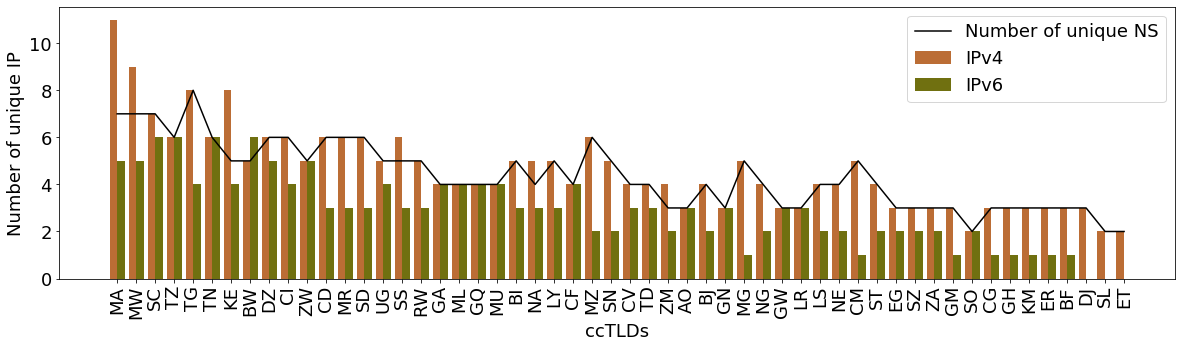

In [20]:
fig, ax = plt.subplots(figsize=(20,5))
order = df['cc'].value_counts().index
lineplot_df = df.groupby('cc')['ns'].nunique().reindex(order)
g = sns.countplot(x='cc', data=df[['cc','ns','af']], ax=ax, hue='af', orient="h", palette=['chocolate','olive'], order = order)
sns.lineplot(data=lineplot_df, ax=ax, label='Number of unique NS', color='black',  sort=False)
ax.set_xlabel("ccTLDs")
ax.set_ylabel("Number of unique IP")
ax.set_xticklabels(df['cc'].value_counts().index, rotation=90)
g.legend(['Number of unique NS', 'IPv4', 'IPv6'], loc='upper right')
plt.savefig('../figures/afri_cctld_nameservers_count_per_prefix.pdf')
plt.show()
plt.close()

##### Top 10 ccTLDs IPs usage #####

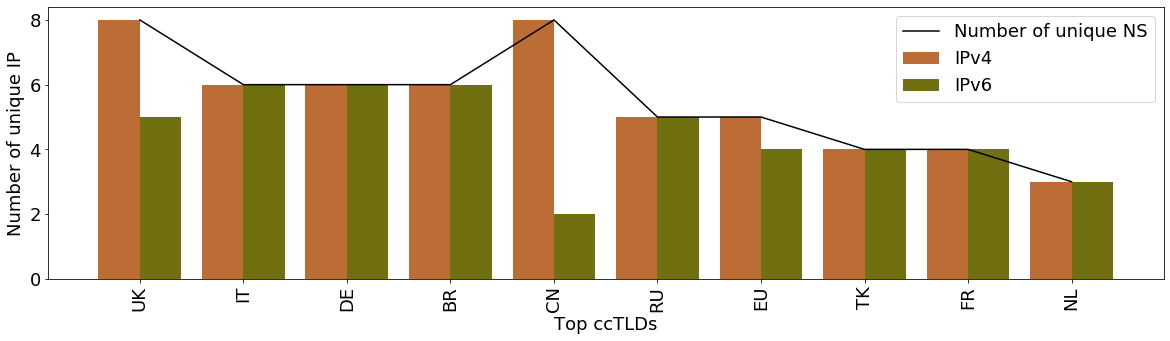

In [21]:
fig, ax = plt.subplots(figsize=(20,5))
order = top_df['cc'].value_counts().index
lineplot_df = top_df.groupby('cc')['ns'].nunique().reindex(order)
g = sns.countplot(x='cc', data=top_df[['cc','ns','af']], ax=ax, hue='af', orient="h", palette=['chocolate','olive'], order = order)
sns.lineplot(data=lineplot_df, ax=ax, label='Number of unique NS', color='black',  sort=False)
ax.set_xlabel("Top ccTLDs")
ax.set_ylabel("Number of unique IP")
ax.set_xticklabels(top_df['cc'].value_counts().index, rotation=90)
g.legend(['Number of unique NS', 'IPv4', 'IPv6'], loc='upper right')
plt.savefig('../figures/top_cctld_nameservers_count_per_prefix.pdf')
plt.show()
plt.close()

#### ASN usage ####

In [22]:
asndf4 = df[df['af'] == 4 ]
asndf6 = df[df['af'] == 6 ]
asnplot_df4 = asndf4.groupby('cc')['asn4'].nunique().reset_index()
asnplot_df6 = asndf6.groupby('cc')['asn6'].nunique().reset_index()

In [23]:
def plot_asn_usage(asnplot_df4, asnplot_df6):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    tmp4_ans = asnplot_df4.copy()
    tmp6_ans = asnplot_df6.copy()
    
    tmp_africa = africa.copy()
    
    tmp4_ans['cc_iso3'] = tmp4_ans['cc'].apply(lambda x: pycountry.countries.get(alpha_2=x).alpha_3)
    tmp6_ans['cc_iso3'] = tmp6_ans['cc'].apply(lambda x: pycountry.countries.get(alpha_2=x).alpha_3)

    
    tmp_africa.loc[:, 'asn4'] = [ tmp4_ans.loc[tmp4_ans['cc_iso3'] == x,'asn4'].values[0]  if x in tmp4_ans['cc_iso3'].tolist() else None for x in africa.iso_a3.tolist() ]
    tmp_africa.loc[:, 'asn6'] = [ tmp6_ans.loc[tmp6_ans['cc_iso3'] == x,'asn6'].values[0]  if x in tmp6_ans['cc_iso3'].tolist() else None for x in africa.iso_a3.tolist() ]

    cmap=plt.get_cmap('RdYlGn')
    tmp_africa.plot(column='asn4',
                ax=ax1,
                legend = True,
                cmap=cmap,
                legend_kwds={'orientation': "vertical", "shrink": .7,},
                missing_kwds={
                "color": "lightgrey",
                "edgecolor": "red",
                "hatch": "///",
                "label": "Missing data",
                },
                edgecolor="black",
        )
    
    tmp_africa.plot(column='asn6',
                ax=ax2,
                legend = True,
                cmap=cmap,
                legend_kwds={'orientation': "vertical", "shrink": .7,},
                missing_kwds={
                "color": "lightgrey",
                "edgecolor": "red",
                "hatch": "///",
                "label": "Missing data",
                },
                edgecolor="black",
        )
    ax1.set_title("")
    ax2.set_title("")
    ax1.set_ylabel("")
    ax2.set_ylabel("")
    ax1.axis('off')
    ax2.axis('off')
    ax1.text(.5,-.1,'(a) IPv4',horizontalalignment='center', transform=ax1.transAxes)
    ax2.text(.5,-.1,'(b) IPv6',horizontalalignment='center', transform=ax2.transAxes)
    plt.savefig('../figures/afri_cctld_nameservers_asn_map.pdf')
    plt.show()
    plt.close()

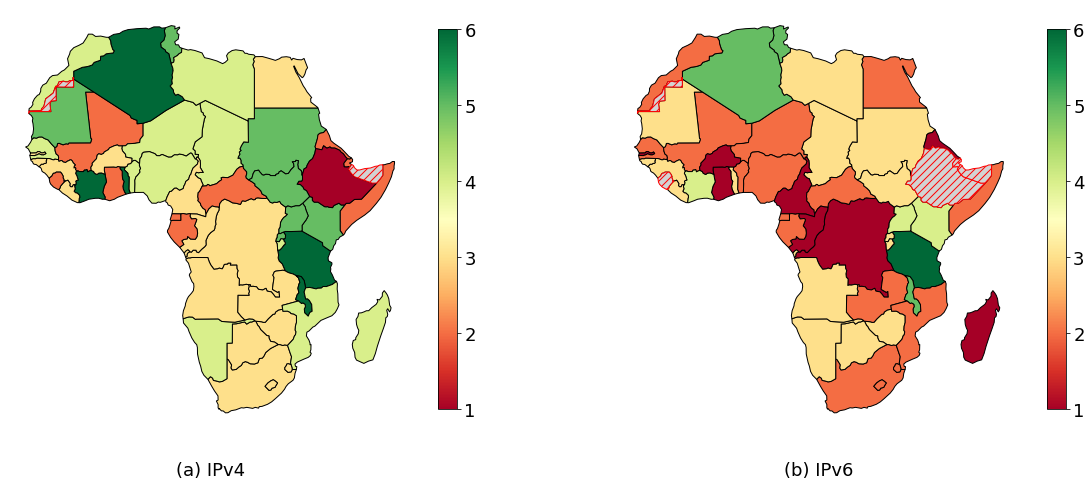

In [24]:
plot_asn_usage(asnplot_df4, asnplot_df6)

### Prefix origin of NS ###

In [56]:
no_ip6_cctld = set(df[df['af'] == 4 ][['cc','region']]['cc'].unique()) - set(df[df['af'] == 6 ][['cc','region']]['cc'].unique())

In [57]:
no_ip6_cctld

{'DJ', 'ET', 'SL'}

In [61]:
def prefix_rir(df, version):
    test_df = df[df['af'] == version ][['cc','region']]
    
    test_df = test_df.groupby('cc')['region'].value_counts().reset_index(name='cc_region')
    test_df['cc_region'] = test_df.groupby('cc')['cc_region'].apply(lambda x:100 * x / float(x.sum()))
    test_df_2d = test_df.pivot_table('cc_region', 'region', 'cc', fill_value=0)
    
    if version == 6:
        for cc in no_ip6_cctld:
            print(cc)
            test_df_2d = test_df_2d.assign(cc = [np.nan,np.nan,np.nan,np.nan, np.nan])
#         test_df_2d = test_df_2d.assign(SL = [np.nan,np.nan,np.nan,np.nan, np.nan])
#         test_df_2d = test_df_2d.assign(ET = [np.nan,np.nan,np.nan,np.nan, np.nan])
#         test_df_2d = test_df_2d.assign(DJ = [np.nan,np.nan,np.nan,np.nan, np.nan])
        test_df_2d = test_df_2d.reindex(sorted(test_df_2d.columns), axis=1)
        
        
    from matplotlib.colors import LinearSegmentedColormap
    mask = test_df_2d.isnull()
    cmap = LinearSegmentedColormap.from_list('mycmap', ['white', 'green', 'yellow','red'])

    grid_kws = {"height_ratios": (.9, .03), "hspace": .1}
    fig, (ax, cbar_ax) = plt.subplots(2, figsize=(20,4), gridspec_kw=grid_kws)
    sns.heatmap(test_df_2d, annot=False, square=True, ax=ax, vmin=0, vmax=100, cmap=cmap, mask=mask, xticklabels=1, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"},linecolor='black',linewidths=1 )

    ax.tick_params(axis='x', labelrotation=90)
    ax.set_ylabel("")
    ax.set_xlabel("")
    plt.savefig('../figures/afri_cctld_out_region_v'+str(version)+'_heatmap_new.pdf')
    plt.show()
    plt.close()

#### IPv4 ####

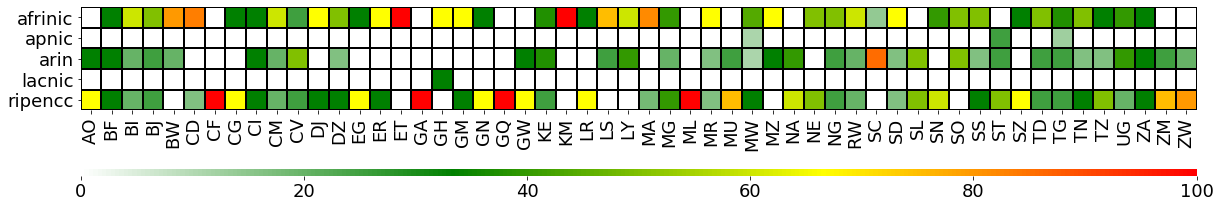

In [62]:
prefix_rir(df, 4)

#### IPv6 ####

SL
DJ
ET


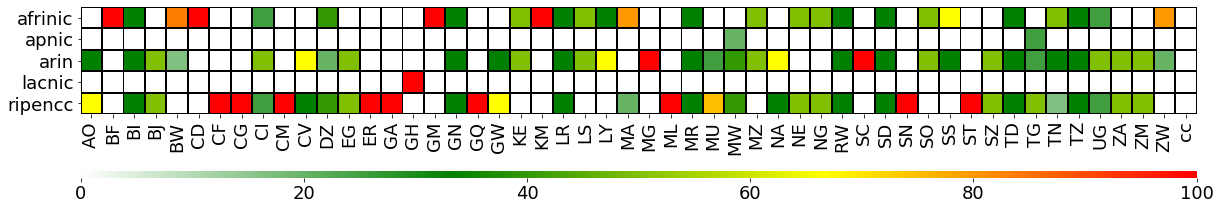

In [63]:
prefix_rir(df, 6)

###  Anycast ###

#### Anycast usage per country ####

In [28]:
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

In [29]:
def plot_anycast_usage(df):
    cmap=plt.get_cmap('RdYlGn_r')
    tmp = df.copy()
    tmp_africa = africa.copy()
    tmp.dropna(inplace=True)
    tmp['cc_iso3'] = tmp['cc'].apply(lambda x: pycountry.countries.get(alpha_2=x).alpha_3)
    
    tmp4 = tmp.groupby('cc_iso3')['cc_iso3','anycast_4'].apply(lambda x: x).drop_duplicates()
    tmp6 = tmp.groupby('cc_iso3')['cc_iso3','anycast_6'].apply(lambda x: x).drop_duplicates()
    
    tmp_africa.loc[:, 'anycast_4'] = [ ('01-Full-Anycast' if  tmp4.loc[tmp4['cc_iso3'] == x, 'anycast_4'].values[0] == 100 else '02-Partial-Anycast' if tmp4[tmp4['cc_iso3'] == x]['anycast_4'].values[0] != 0 else '03-No-Anycast')  if x in tmp4['cc_iso3'].tolist() else None for x in africa.iso_a3.tolist() ]
    tmp_africa.loc[:, 'anycast_6'] = [ ('01-Full-Anycast' if tmp6.loc[tmp6['cc_iso3'] == x, 'anycast_6'].values[0] == 100 else '02-Partial-Anycast' if tmp6[tmp6['cc_iso3'] == x]['anycast_6'].values[0] != 0 else '03-No-Anycast')  if x in tmp6['cc_iso3'].tolist() else None for x in africa.iso_a3.tolist() ]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    tmp_africa.plot(column='anycast_4',
            ax=ax1,
            legend = True,
            missing_kwds={
            "color": "lightgrey",
            "edgecolor": "red",
            "hatch": "///",
            "label": "Missing data",
            },
            edgecolor="black",
            cmap=cmap,
                categorical=True,

    )
    
    tmp_africa.plot(column='anycast_6',
        ax=ax2,
        legend = True,
        missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing data",
        },
        edgecolor="black",
        cmap=cmap,
    )
    
    legend_dict = {'01-Full-Anycast':'Full-Anycast', '02-Partial-Anycast':'Partial-Anycast', '03-No-Anycast':'No-Anycast'}

                
    replace_legend_items(ax1.get_legend(), legend_dict)
    replace_legend_items(ax2.get_legend(), legend_dict)
    
    ax1.set_title("")
    ax2.set_title("")
    ax1.set_ylabel("")
    ax2.set_ylabel("")
    ax1.axis('off')
    ax2.axis('off')
    leg1 = ax1.get_legend()
    leg1.set_bbox_to_anchor((.3,.5))
    leg2 = ax2.get_legend()
    leg2.set_bbox_to_anchor((.3,.5))
    ax1.text(.5,-.1,'(a) IPv4',horizontalalignment='center', transform=ax1.transAxes)
    ax2.text(.5,-.1,'(b) IPv6',horizontalalignment='center', transform=ax2.transAxes)
    plt.savefig('../figures/afri_cctld_nameserver_ip_anycast_map_new.pdf')
    plt.show()
    plt.title('Anycast ratio')
    plt.close()


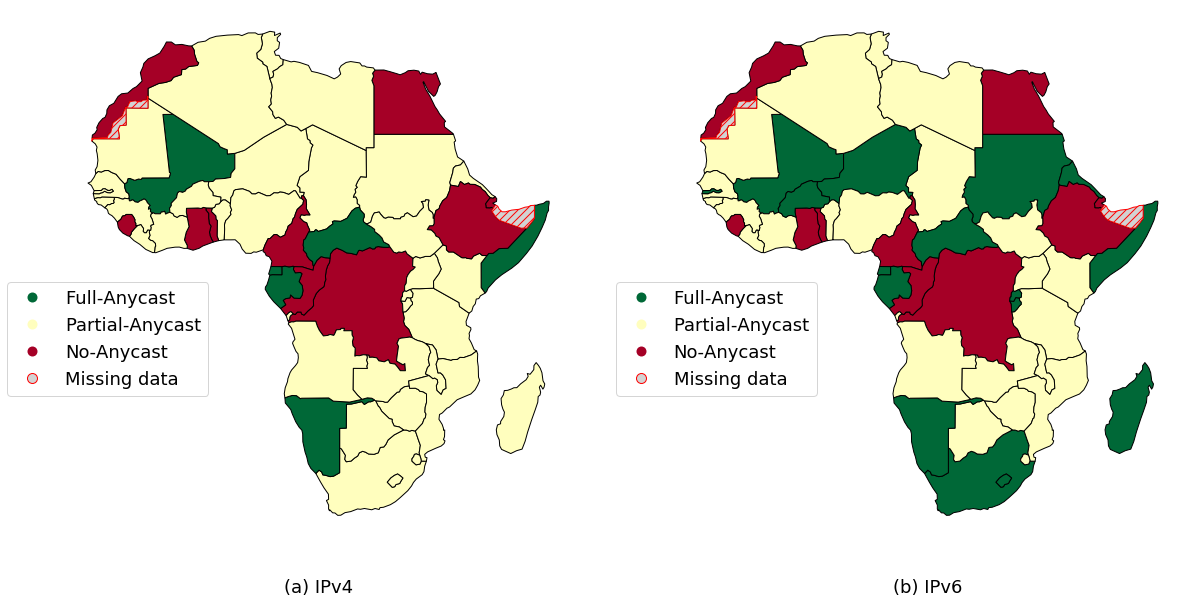

In [30]:
plot_anycast_usage(df)

#### Get list of Anycast providers #####

In [31]:
anycast_provider_df = df[df['anycast_provider'] != '']

##### Countries which seems not using anycast #####

In [32]:
set(df['cc'].unique()) - set(anycast_provider_df['cc'].unique())

{'CD', 'CG', 'CM', 'DJ', 'EG', 'ET', 'GH', 'MA', 'SL', 'ST', 'TG'}

##### Anycast provider per country #####

In [33]:
anycast_provider_df_filtered = anycast_provider_df.groupby(['cc','anycast_provider']).size().reset_index()

In [34]:
anycast_provider_dict = {}
for index,row in anycast_provider_df_filtered.iterrows():
    cc = row['cc']
    provider = row['anycast_provider']
    provider_ratio = df[df['cc'] == cc]['anycast_provider_ratio'].tolist()
    provider_ratio = provider_ratio[-1]
    provider_ratio = provider_ratio.split(',')
    ratio = round((sum([1 for x in provider_ratio if x.strip() == provider.strip()])/ len(provider_ratio))*100,2)
    if cc in anycast_provider_dict.keys():
         anycast_provider_dict[cc].update({ provider: ratio })
    else:
        anycast_provider_dict[cc] = { provider: ratio }

In [35]:
no_anycast_cctlds_list = set(df['cc'].unique()) - set(anycast_provider_dict.keys())

In [36]:
for cc in no_anycast_cctlds_list:
    anycast_provider_dict[cc] = {'NO ANYCAST': 100}

In [37]:
anycast_provider_dict = collections.OrderedDict(sorted(anycast_provider_dict.items(), reverse=True))

In [38]:
anycast_provider_dict.keys()

odict_keys(['ZW', 'ZM', 'ZA', 'UG', 'TZ', 'TN', 'TG', 'TD', 'SZ', 'ST', 'SS', 'SO', 'SN', 'SL', 'SD', 'SC', 'RW', 'NG', 'NE', 'NA', 'MZ', 'MW', 'MU', 'MR', 'ML', 'MG', 'MA', 'LY', 'LS', 'LR', 'KM', 'KE', 'GW', 'GQ', 'GN', 'GM', 'GH', 'GA', 'ET', 'ER', 'EG', 'DZ', 'DJ', 'CV', 'CM', 'CI', 'CG', 'CF', 'CD', 'BW', 'BJ', 'BI', 'BF', 'AO'])

In [39]:
anycast_provider_dict

OrderedDict([('ZW', {'pch': 100.0}),
             ('ZM', {'pch': 100.0}),
             ('ZA', {'dnsnode': 50.0, 'pch': 50.0}),
             ('UG', {'afrinic': 33.33, 'pch': 33.33, 'ripe': 33.33}),
             ('TZ', {'afrinic': 33.33, 'dnsnode': 33.33, 'pch': 33.33}),
             ('TN', {'afrinic': 50.0, 'pch': 50.0}),
             ('TG', {'NO ANYCAST': 100}),
             ('TD', {'afrinic': 50.0, 'pch': 50.0}),
             ('SZ', {'ripe': 100.0}),
             ('ST', {'NO ANYCAST': 100}),
             ('SS', {'afrinic': 33.33, 'other': 33.33, 'pch': 33.33}),
             ('SO', {'afrinic': 50.0, 'pch': 50.0}),
             ('SN', {'ripe': 100.0}),
             ('SL', {'NO ANYCAST': 100}),
             ('SD', {'afrinic': 33.33, 'pch': 33.33, 'ripe': 33.33}),
             ('SC', {'afilias': 100.0}),
             ('RW', {'afrinic': 33.33, 'dnsnode': 33.33, 'pch': 33.33}),
             ('NG', {'afrinic': 50.0, 'other': 25.0, 'pch': 25.0}),
             ('NE', {'afrinic': 50.0, 'ripe': 

##### Plot Anycast providers usage #####

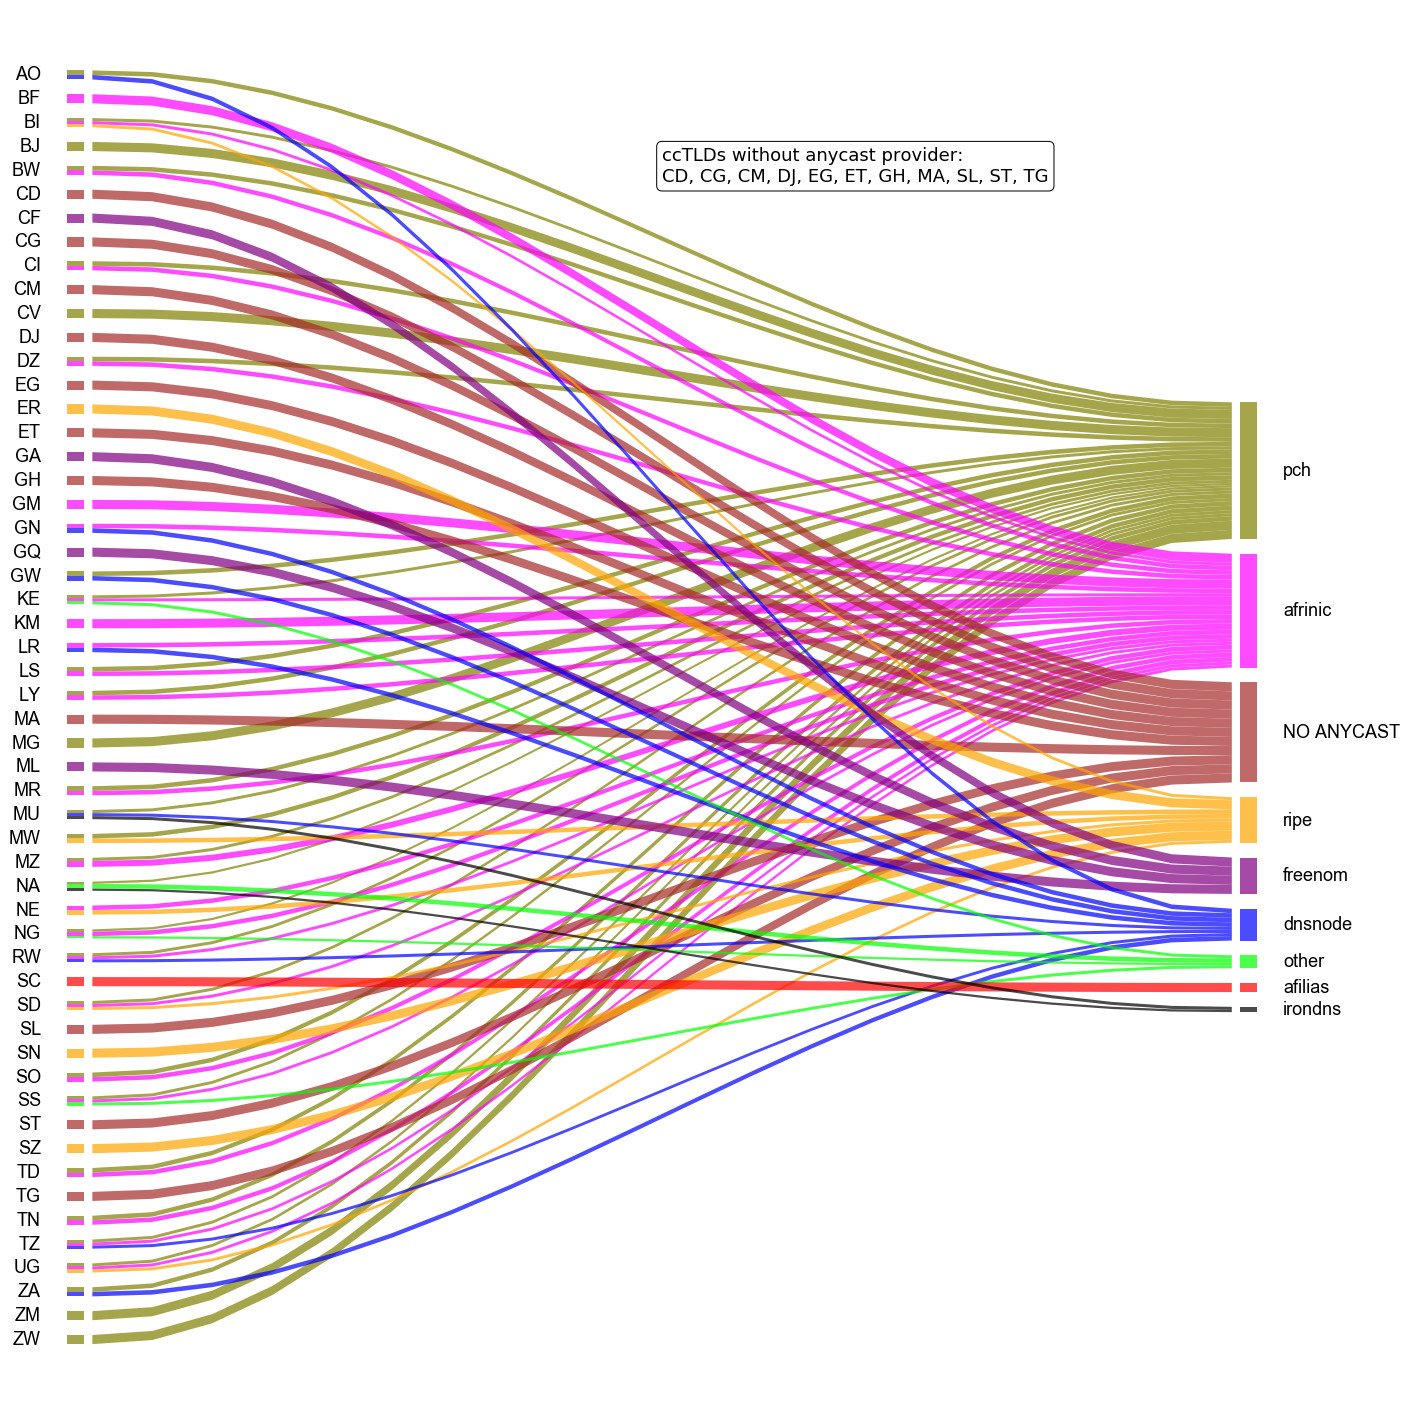

In [40]:
cmap=plt.get_cmap('Set1')
ax = alluvial.plot(anycast_provider_dict,
                   alpha=.7,
                  color_side=1, 
                   figsize=(20,20),
#                    figsize=(5,20),
                   colors = ['black', 'red','lime','blue', 'purple', 'orange', 'brown', 'magenta', 'olive'],
                   a_sort = list(anycast_provider_dict.keys()), 
                   label_shift=20)

plt.tight_layout()
no_anycast_cctlds = 'ccTLDs without anycast provider: \nCD, CG, CM, DJ, EG, ET, GH, MA, SL, ST, TG'
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white')
# place a text box in upper left in axes coords
ax.text(.5, 0.90, no_anycast_cctlds, transform=ax.transAxes, verticalalignment='top', bbox=props)
# plt.savefig('../figures/afri_cctld_anycast_provider_all_small.pdf')
plt.savefig('../figures/afri_cctld_anycast_provider_all.pdf')
plt.show()
plt.close()

### DNSSEC ####

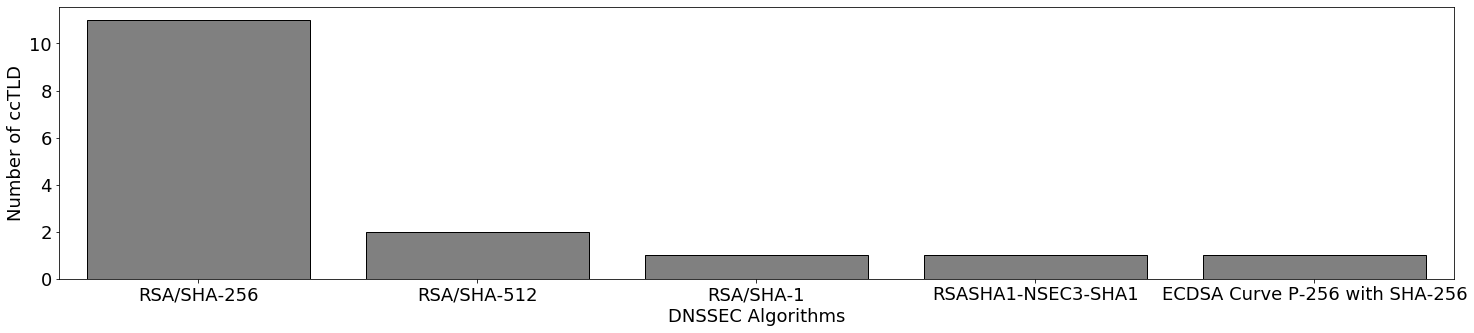

In [41]:
fig, ax = plt.subplots(figsize=(25,5))
tmp_df = df[df['dnssec_algo'] != ''].groupby(['cc','dnssec_algo']).nunique().index.to_frame()
sns.countplot(x='dnssec_algo', data=tmp_df[['cc','dnssec_algo']], color="grey", edgecolor='black', ax=ax, orient="h", order = tmp_df['dnssec_algo'].value_counts().index)
ax.set_ylabel("Number of ccTLD")
ax.set_xlabel("DNSSEC Algorithms")
plt.savefig('../figures/afri_cctld_nameservers_dnssec_algo.pdf')
plt.show()
plt.close()

In [42]:
tmp_africa = africa.copy()
tmp_df = df[df['dnssec_algo'] != ''].groupby(['cc','dnssec_algo']).nunique().index.to_frame()
tmp_df['cc_iso3'] = tmp_df['cc'].apply(lambda x: pycountry.countries.get(alpha_2=x).alpha_3)
tmp_africa.loc[:, 'dnssec_algo'] = [ tmp_df[tmp_df['cc_iso3'] == x]['dnssec_algo'].values[0]  if x in tmp_df['cc_iso3'].tolist() else None for x in africa.iso_a3.tolist() ]

In [43]:
tmp_df_full = df.groupby(['cc','dnssec_algo']).nunique().index.to_frame()
algo_dict = {}
for k,v in tmp_df_full[['dnssec_algo']].to_dict()['dnssec_algo'].items():
    if v not in algo_dict.keys():
        algo_dict[v] = [k[0]]
    else:
        algo_dict[v].append(k[0])
        
algo_dict['Not signed'] = algo_dict[''] 
del algo_dict[''] 

algo_dict_len = {}
for k,v in algo_dict.items():
    
    algo_dict_len[k] = len(v)
# algo_dict
algo_dict_len
total = sum(algo_dict_len.values())

In [44]:
legend_dict={ k:"{0}: {1} ccTLD ({2}%)".format(k, v, (v/total)*100) for k, v in algo_dict_len.items() }
legend_dict = {}
for k, v in algo_dict_len.items():
        legend_dict[k] = "{0}: {1} ccTLD ({2}%)".format(k, v, round((v/total)*100))
legend_dict

{'RSA/SHA-256': 'RSA/SHA-256: 11 ccTLD (20%)',
 'RSA/SHA-512': 'RSA/SHA-512: 2 ccTLD (4%)',
 'RSA/SHA-1': 'RSA/SHA-1: 1 ccTLD (2%)',
 'RSASHA1-NSEC3-SHA1': 'RSASHA1-NSEC3-SHA1: 1 ccTLD (2%)',
 'ECDSA Curve P-256 with SHA-256': 'ECDSA Curve P-256 with SHA-256: 1 ccTLD (2%)',
 'Not signed': 'Not signed: 38 ccTLD (70%)'}

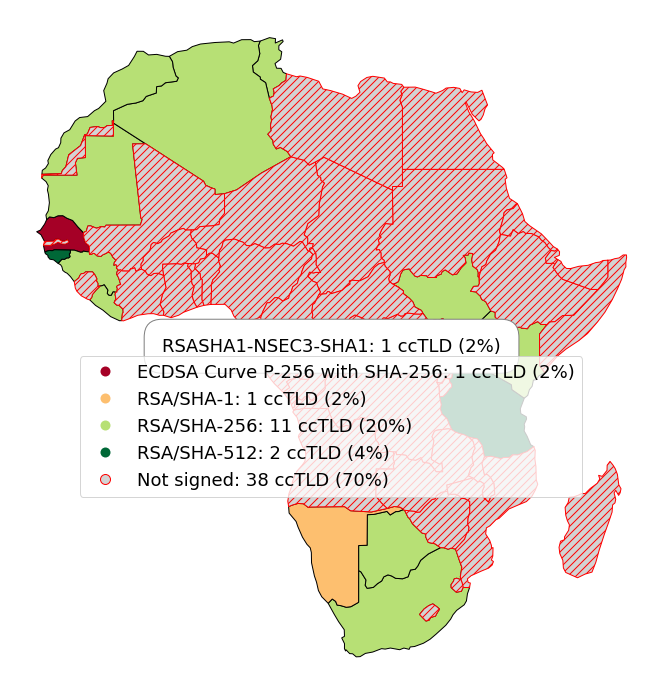

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
cmap=plt.get_cmap('RdYlGn')
tmp_africa.plot(column='dnssec_algo',
            ax=ax,
            legend = True,
            cmap=cmap,
            categorical = True,
            missing_kwds={
            "color": "lightgrey",
            "edgecolor": "red",
            "hatch": "///",
            "label": "Not signed",
            },
            edgecolor="black",
    )
                
replace_legend_items(ax.get_legend(), legend_dict)

ax.set_title("")
ax.set_ylabel("")
ax.axis('off')
leg = ax.get_legend()
leg.set_bbox_to_anchor((.9,.5))
plt.text(-3,.8,legend_dict['RSASHA1-NSEC3-SHA1'], bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=1'))
plt.tight_layout()
plt.savefig('../figures/afri_cctld_nameservers_dnssec_algo_map.pdf')
plt.show()
plt.close()

##### Incompatible result between IANA records and Deploy360 DNSSEC report #####

In [46]:
set(df[df['deploy360'] == True]['cc'].unique()) - set(df[df['dnssec'] == True]['cc'].unique())

{'CI', 'MG', 'MU', 'ZM'}

### Zonemaster misconfigurations report ###

In [47]:
def plot_zonemaster_module_tag(df, africa):
    tmp = df.copy()
    tmp.dropna(inplace=True)
    tmp['cc_iso3'] = tmp['cc'].apply(lambda x: pycountry.countries.get(alpha_2=x).alpha_3)
    tmp_tag = tmp.groupby('cc_iso3')['cc_iso3','tag'].apply(lambda x: x).drop_duplicates()
    tmp_module = tmp.groupby('cc_iso3')['cc_iso3','module'].apply(lambda x: x).drop_duplicates()
    tmp_level = tmp.groupby('cc_iso3')['cc_iso3','level'].apply(lambda x: x).drop_duplicates()

    tmp_africa = africa.copy()
    tmp_africa.loc[:, 'tag'] = [ tmp_tag[tmp_tag['cc_iso3'] == x]['tag'].values[0]  if x in tmp_tag['cc_iso3'].tolist() else None for x in africa.iso_a3.tolist() ]
    tmp_africa.loc[:, 'module'] = [ tmp_module[tmp_module['cc_iso3'] == x]['module'].values[0]  if x in tmp_module['cc_iso3'].tolist() else None for x in africa.iso_a3.tolist() ]
    tmp_africa.loc[:, 'level'] = [ tmp_level[tmp_level['cc_iso3'] == x]['level'].values[0]  if x in tmp_level['cc_iso3'].tolist() else None for x in africa.iso_a3.tolist() ]

    tmp_africa['tag'] = tmp_africa['tag'].astype('category')
    tmp_africa['module'] = tmp_africa['module'].astype('category')
    tmp_africa['level'] = tmp_africa['level'].astype('category')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10))
    tmp_africa.plot(column='module',
            ax=ax1,
            legend = True,
            categorical=True,
            missing_kwds={
            "color": "lightgrey",
            "edgecolor": "red",
            "hatch": "///",
            "label": "Missing data",
            },
            edgecolor="black",
    )
    
    tmp_africa.plot(column='tag',
            ax=ax2,
            legend = True,
            categorical=True,
            missing_kwds={
            "color": "lightgrey",
            "edgecolor": "red",
            "hatch": "///",
            "label": "Missing data",
            },
            edgecolor="black",
    )

    ax1.set_title("")
    ax2.set_title("")
    ax1.set_ylabel("")
    ax2.set_ylabel("")
    ax1.axis('off')
    ax2.axis('off')
    leg1 = ax1.get_legend()
    leg1.set_bbox_to_anchor((.3,.5))
    leg2 = ax2.get_legend()
    leg2.set_bbox_to_anchor((.3,.65))
    ax1.text(.5,-.1,'(a) ZoneMaster Categories',horizontalalignment='center', transform=ax1.transAxes)
    ax2.text(.5,-.1,'(b) ZoneMaster Tests cases',horizontalalignment='center', transform=ax2.transAxes)
    plt.savefig('../figures/afri_cctld_nameserver_zonemaster_results_map_legend_position.pdf')
    plt.show()
    plt.close()
    return tmp_africa

##### Sub regional repartition #####

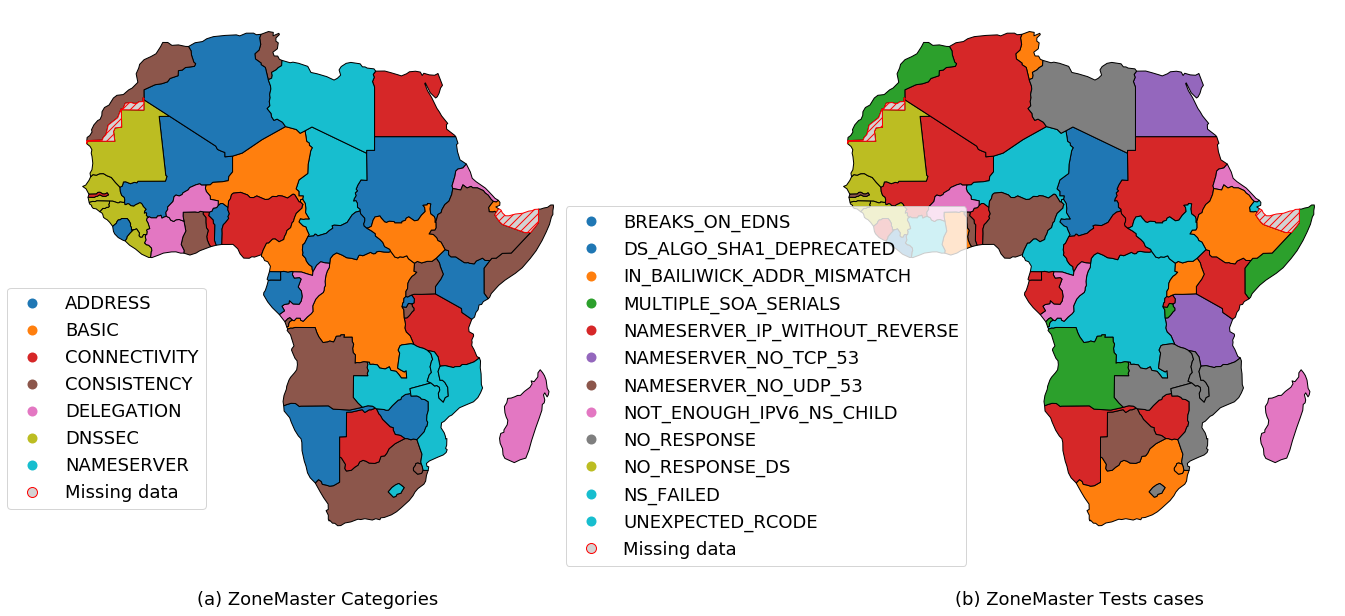

In [48]:
africa_zonemaster = plot_zonemaster_module_tag(zdf, africa)

##### Categories and tests cases #####

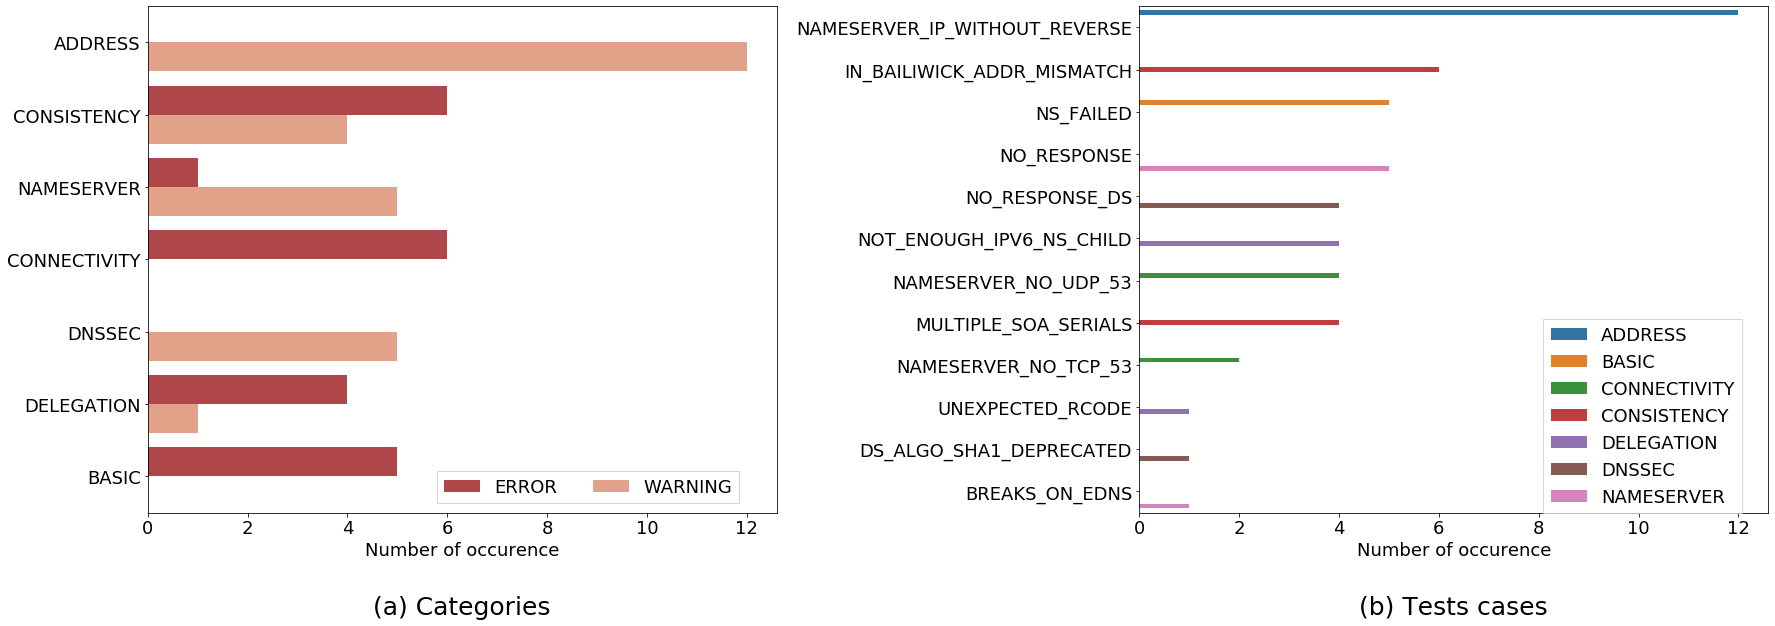

In [49]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,9))
sns.countplot(y='module', data=africa_zonemaster, ax=ax1, hue="level", order = africa_zonemaster['module'].value_counts().index, palette=sns.color_palette("RdBu"))
sns.countplot(y='tag', data=africa_zonemaster, ax=ax2, hue="module", order = africa_zonemaster['tag'].value_counts().index)
ax1.set_xlabel("Number of occurence")
ax2.set_ylabel("")
ax1.set_ylabel("")
ax2.set_xlabel("Number of occurence")

ax1.text(.5,-.2,'(a) Categories',horizontalalignment='center', transform=ax1.transAxes, fontsize=25)
ax2.text(.5,-.2,'(b) Tests cases',horizontalalignment='center', transform=ax2.transAxes, fontsize=25)
ax1.legend(loc='upper center', bbox_to_anchor=(0.7, .1), ncol=3, fancybox=False, shadow=False)
ax2.legend(loc='upper center', bbox_to_anchor=(0.8, .4), ncol=1, fancybox=False, shadow=False)

plt.tight_layout()
plt.savefig('../figures/afri_cctld_nameserver_zonemaster_category_tests_results.pdf')
plt.show()
plt.close()

##### Zonemaster misconfigurations per test case #####

In [50]:
tests = zdataf['test'].unique()

In [51]:
countries_misconf = {}
for test in tests:
    countries_misconf[test] = list(zdataf[zdataf['test'] == test]['cc'].unique())

In [52]:
countries_misconf

{'MULTIPLE_SOA_SERIALS': ['AO',
  'BF',
  'BI',
  'CM',
  'ER',
  'GQ',
  'MA',
  'NE',
  'SD',
  'SO',
  'SS',
  'TG',
  'TN'],
 'SOA_SERIAL_VARIATION': ['AO',
  'BF',
  'BI',
  'CM',
  'ER',
  'GQ',
  'MA',
  'NE',
  'SD',
  'SO',
  'SS',
  'TG',
  'TN'],
 'NEITHER_DNSKEY_NOR_DS': ['AO',
  'BF',
  'BI',
  'BJ',
  'CD',
  'CF',
  'CG',
  'CI',
  'CM',
  'CV',
  'DJ',
  'EG',
  'ER',
  'GA',
  'GH',
  'GM',
  'GQ',
  'KM',
  'LS',
  'LY',
  'MG',
  'ML',
  'MU',
  'MW',
  'MZ',
  'NE',
  'NG',
  'RW',
  'SD',
  'SO',
  'ST',
  'SZ',
  'TD',
  'TG',
  'ZM',
  'ZW'],
 'NOT_SIGNED': ['AO',
  'BF',
  'BI',
  'BJ',
  'CD',
  'CF',
  'CG',
  'CI',
  'CM',
  'CV',
  'DJ',
  'EG',
  'ER',
  'GA',
  'GH',
  'GM',
  'GQ',
  'KM',
  'LS',
  'LY',
  'MG',
  'ML',
  'MU',
  'MW',
  'MZ',
  'NE',
  'NG',
  'RW',
  'SD',
  'SO',
  'ST',
  'SZ',
  'TD',
  'TG',
  'ZM',
  'ZW'],
 'NO_RESPONSE': ['AO',
  'BF',
  'BI',
  'BJ',
  'BW',
  'CD',
  'CF',
  'CG',
  'CI',
  'CM',
  'CV',
  'DZ',
  'EG',
  'ER'